<a href="https://colab.research.google.com/github/hrshwrdhn/blast-ct/blob/master/test_demobrain1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OSError: ignored

In [1]:

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
root_path = '/content/gdrive/My Drive/sandlogic/blast_ct'  #change dir to your project folder

In [3]:
import os
os.chdir('/content/gdrive/My Drive/sandlogic/blast_ct')


In [4]:
!ls

blast-ct-example  inference.py	     nifti	       scan_0_image.nii.gz
console_tool.py   __init__.py	     __pycache__       trainer
data		  models	     read_config.py    train.py
demo.py		  my-inference-job2  run_hws.py
demo_train.py	  my-training-job    run_train_hws.py


In [5]:
pip install SimpleITK

     |████████████████████████████████| 42.5MB 72kB/s 


In [ ]:
import os

from demo import brainSeg


job_dir = 'my-inference-job2'
test_csv_path = 'data/data.csv'
config_file = 'data/config.json'
device = 0

#install_dir = os.path.dirname(os.path.realpath(__file__))  #install directory
install_dir = os.getcwd()
#saved_model_paths = [os.path.join(install_dir, f'data/saved_models/model_{i:d}.pt') for i in range(1, 13)]
saved_model_paths="data/saved_models/model_1.pt data/saved_models/model_2.pt"
write_prob_maps = False # type=bool, help='Whether to write probability maps images to disk')
overwrite = 'true'
brainSeg.run_inference(job_dir, test_csv_path, config_file,saved_model_paths, device,write_prob_maps, overwrite)

ModuleNotFoundError: ignored

In [ ]:
!python run_train_hws.py


Run already exists, overwriting...
Setting up configuration...
tcmalloc: large alloc 1536000000 bytes == 0x236f2000 @  0x7fce0c3bd1e7 0x7fce09cd15e1 0x7fce09d35c78 0x7fce09d35f37 0x7fce09dcdf28 0x50a7f5 0x50cfd6 0x507f24 0x509c50 0x50a64d 0x50c1f4 0x509015 0x594b01 0x59fe1e 0x5578f8 0x50c4de 0x509918 0x50a64d 0x50c1f4 0x507f24 0x509c50 0x50a64d 0x50c1f4 0x509918 0x50a64d 0x50c1f4 0x507f24 0x509c50 0x50a64d 0x50c1f4 0x507f24
tcmalloc: large alloc 1536000000 bytes == 0x7efca000 @  0x7fce0c3bd1e7 0x7fce09cd15e1 0x7fce09d35c78 0x7fce09d35d93 0x7fce09de8fed 0x7fce09de994e 0x7fce09dec2c8 0x7fce09f2c276 0x7fce09f2dd44 0x7fce09f30492 0x7fce09f3130e 0x5a4a0c 0x5a50d8 0x59cb00 0x510f15 0x509918 0x50a64d 0x50c1f4 0x507f24 0x509c50 0x50a64d 0x50c1f4 0x509918 0x50a64d 0x50c1f4 0x507f24 0x509c50 0x50a64d 0x50c1f4 0x507f24 0x509c50
tcmalloc: large alloc 1536000000 bytes == 0x236f2000 @  0x7fce0c3bd1e7 0x7fce09cd15e1 0x7fce09d35c78 0x7fce09d35d93 0x7fce09d8436b 0x7fce09dc3439 0x50a7f5 0x50c1f4 0x50991

In [6]:
import SimpleITK as sitk
import numpy as np

# A path to a T1-weighted brain .nii image:
t1_fn = './scan_0_image.nii.gz'

# Read the .nii image containing the volume with SimpleITK:
sitk_t1 = sitk.ReadImage(t1_fn)

# and access the numpy array:
t1 = sitk.GetArrayFromImage(sitk_t1)

In [8]:
t1.shape

(149, 201, 201)

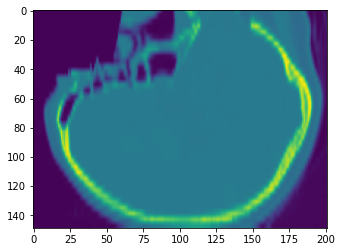

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(t1[:,:,100])

In [13]:

t2 = sitk.ReadImage('./blast-ct-example/data/scans/scan_0/scan_0_segmentation.nii.gz')

In [15]:
t2 = sitk.GetArrayFromImage(t2)

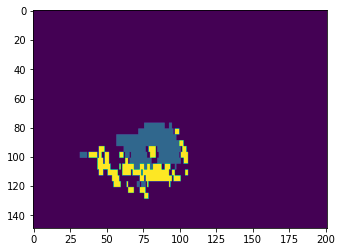

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(t2[:,:,100])

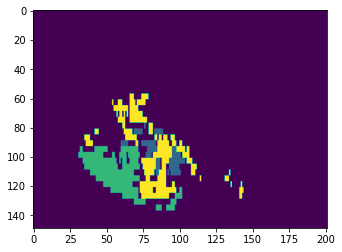

In [20]:

t3 = sitk.ReadImage('./blast-ct-example/data/scans/scan_0/scan_0_segmentation.nii.gz')
t3 = sitk.GetArrayFromImage(t3)
plt.imshow(t3[:,:,80])

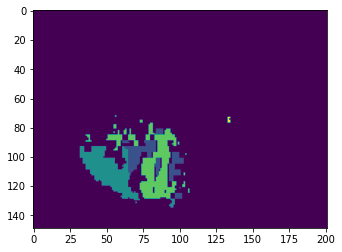

In [21]:


t4 = sitk.ReadImage('./my-inference-job2/predictions/scan_0_prediction.nii.gz')
t4 = sitk.GetArrayFromImage(t4)
plt.imshow(t4[:,:,80])


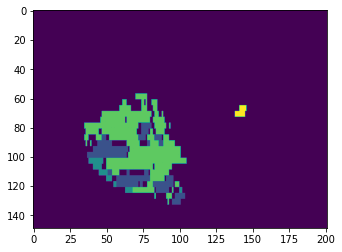

In [27]:
plt.imshow(t3[:,:,70])


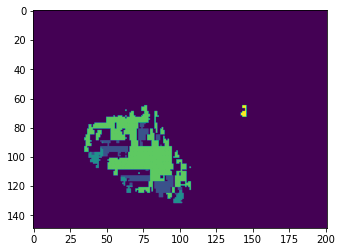

In [28]:

plt.imshow(t4[:,:,70])